<a href="https://colab.research.google.com/github/Bala-Subramanian-G/Data-Analysis-using-Python/blob/main/Titanic%20Dataset%20Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA ANALYSIS AND DATA VISUALISATION ON TITANIC DATASET**

##Importing Data and understanding it

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

[Click here](https://docs.google.com/spreadsheets/d/1U5i9rslzpEFfbSyy0d2LhsvOpBw3GxNh/edit?usp=sharing&ouid=106167233124360229976&rtpof=true&sd=true) to download the dataset

In [ ]:
titanic = pd.read_excel("/content/drive/MyDrive/Practice Datasets/Titanic DS.xlsx")
titanic.head()

,pclass,survived,name,Unnamed: 3,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",NaN,female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",NaN,male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",NaN,female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",NaN,male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",NaN,female,25.0000,1,2,113781,151.5500,S


In [ ]:
titanic.info()  # Schema of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   object 
 3   Unnamed: 3  0 non-null      float64
 4   sex         1309 non-null   object 
 5   age         1046 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  embarked    1307 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival - Survival (0 = No; 1 = Yes)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
# Deleting an unwanted column
del titanic['Unnamed: 3']

In [ ]:
# Updating the values of survival columns

titanic.survived = titanic.survived.apply(
    lambda a:'survived' if a==1 else 'died')

In [ ]:
# Rounding off the age and fare to 2 decimal

titanic.age = titanic.age.apply(lambda a:round(a,2))
titanic.fare = titanic.fare.apply(lambda a:round(a,2))

In [ ]:
# Creating the new column called Age Group

def age_group(age):
  if age<=12:
    return 'Children'
  elif age>12 and age<=18:
    return 'Teenagers'
  elif age>18 and age <=60:
    return 'Adults'
  elif age>60:
    return 'Senior Citizens'
  else:
    return np.nan

titanic['age_group'] = titanic.age.apply(age_group)

In [ ]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_group
0,1,survived,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.34,S,Adults
1,1,survived,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,S,Children
2,1,died,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,S,Children
3,1,died,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.55,S,Adults
4,1,died,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,S,Adults
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,died,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.45,C,Teenagers
1305,3,died,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.45,C,NaN
1306,3,died,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.22,C,Adults
1307,3,died,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.22,C,Adults


## Total no of Passengers, No of Alive Passenger, No of dead Passenger, Average Fare Price

In [ ]:
total = titanic.shape[0]
print('Total no of passengers:',total)

survival = titanic['survived'].value_counts()
print('\nNo of Alive Passenger:',survival[1])
print('No of dead Passenger:',survival[0])

total_fare=titanic['fare'].mean()
print('\nAverage Fare Price:',round(total_fare,2))

Total no of passengers: 1309

No of Alive Passenger: 500
No of dead Passenger: 809

Average Fare Price: 33.3


## Gender based Classification

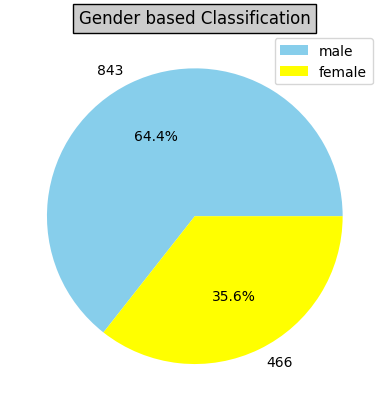

In [ ]:
y = titanic['sex'].value_counts()

plt.pie(y, autopct='%0.1f%%',
        labels=y.values,
        colors=["#87CEEB",'yellow'])
plt.title('Gender based Classification', bbox={'facecolor':'0.8'})
plt.legend(y.index)
plt.show()

## Passengers by class

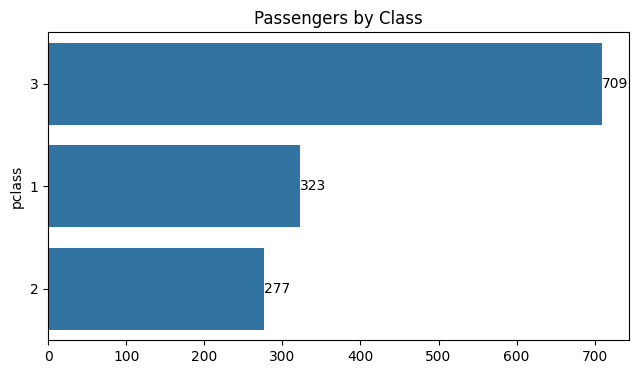

In [ ]:
plt.figure(figsize=(7.5,4))
a = sns.countplot(y = titanic.pclass,
                  order= titanic.pclass.value_counts().index)
for i in a.containers:
  a.bar_label(i)
plt.title('Passengers by Class'), plt.xlabel('')
plt.show()

## Passenger based on Age Group

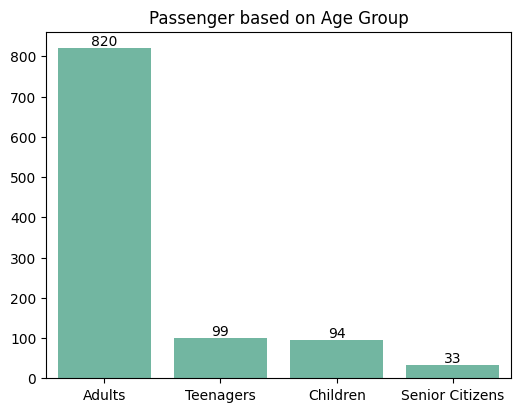

In [ ]:
plt.figure(figsize=(6,4.5))
# figure = sns.countplot(data = titanic, x = 'age_group', palette = "Set2",
#                        order= titanic.age_group.value_counts().index)
figure = sns.countplot(data = titanic, x = 'age_group',
                       palette = "Set2", hue = x, legend=False,
                       order= titanic.age_group.value_counts().index)
# Using palette parameter without using hue parameter will be deprecated
# So for getting the same result, I assigned x to the hue.

for i in figure.containers:
    figure.bar_label(i)
plt.title('Passenger based on Age Group')
plt.xlabel(''),plt.ylabel('')
plt.show()

##survival & died percentage

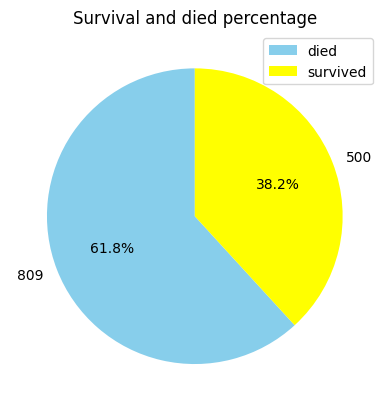

In [ ]:
#survival & died percentage
z = titanic.survived.value_counts()

plt.pie(z, labels=z.values, autopct='%0.1f%%',
        colors=["#87CEEB",'yellow'], startangle=90)
plt.title('Survival and died percentage')
plt.legend(z.index)
plt.show()

## Survival by gender

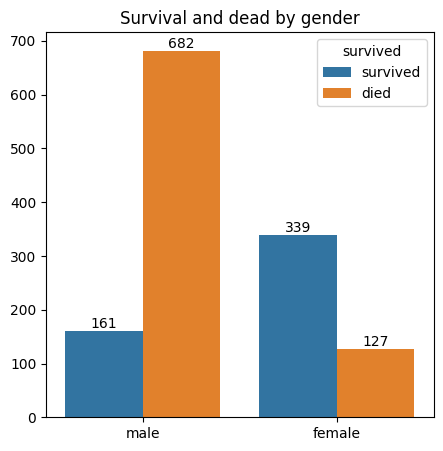

In [ ]:
plt.figure(figsize=(5,5))
x = sns.countplot(data = titanic, x = "sex", hue="survived",
                  order= titanic.sex.value_counts().index)
plt.title("Survival and dead by gender")
plt.xlabel(''), plt.ylabel('')
for i in x.containers:
    x.bar_label(i)

Observation:
* Male passengers have 19% of probability of survival.
* Female passengers have 72% of probability of survival.

## Survival by age group

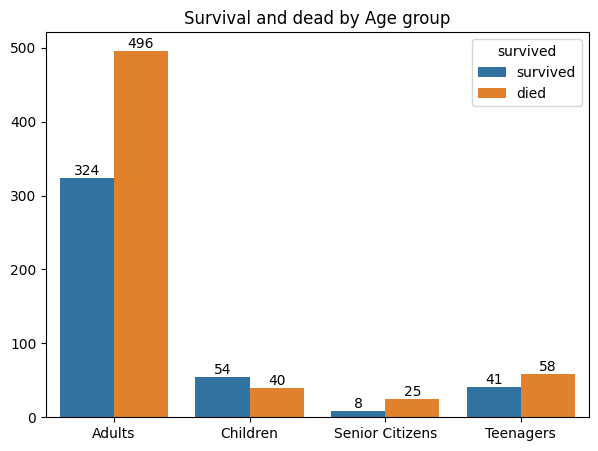

In [ ]:
plt.figure(figsize=(7,5))
x = sns.countplot(titanic, x='age_group', hue='survived')
for i in x.containers:
  x.bar_label(i)
plt.title("Survival and dead by Age group")
plt.xlabel(''), plt.ylabel('')
plt.show()

Observation:
* Children have 57% of probability of Survival.
* Teenagers and Adults have around 40% of probability of Survival.
* Senior citizens have more 24% of probability of Survival.


## Survival by Passenger Classes

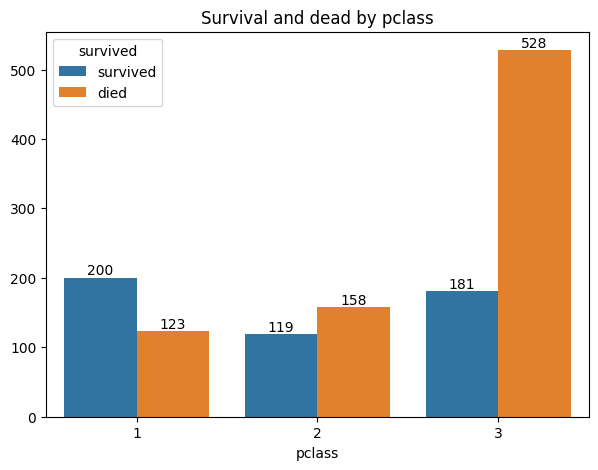

In [ ]:
plt.figure(figsize=(7,5))
x = sns.countplot(titanic, x='pclass', hue='survived')
for i in x.containers:
  x.bar_label(i)
plt.title("Survival and dead by pclass")
plt.ylabel('')
plt.show()

Observation:
* Class-1 Passengers have 61% of probability of Survival.
* Class-2 Passengers have 42% of probability of Survival.
* Class-3 Passengers have 25% of probability of Survival.

## Survival of passenger depending on number of Parents and Children they travelled with

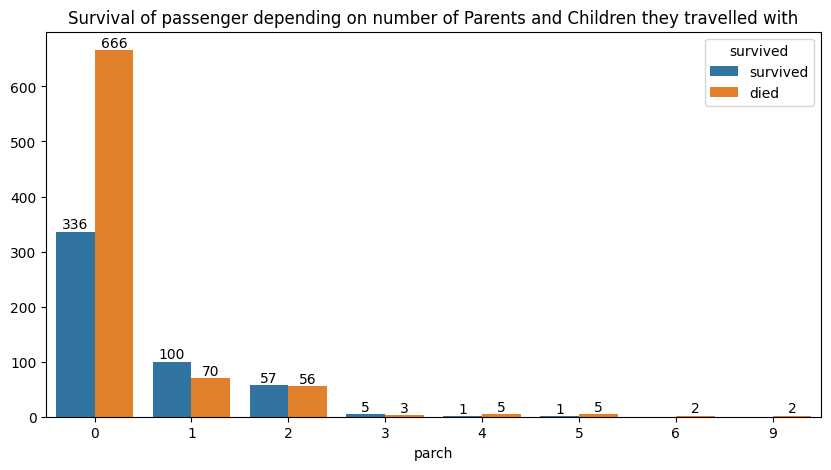

In [ ]:
plt.figure(figsize=(10,5))
x = sns.countplot(titanic, x='parch', hue='survived')
for i in x.containers:
  x.bar_label(i)
plt.title("Survival of passenger depending on number of Parents and Children they travelled with")
plt.ylabel('')
plt.show()

Observations:
* Passengers who have travelled with no parents/children have nearly ⅓rd of probability of Survival.
* Passengers who have travelled with one parents/children have 58% probability of Survival.
* Passengers who have travelled with 2 or 3 parents/children have nearly 50% probability of Survival.
* Passengers who have travelled with more than 3 parents/children have very less probability of survival.

## Survival of passenger depending on number of Siblings and Spouse they travelled with

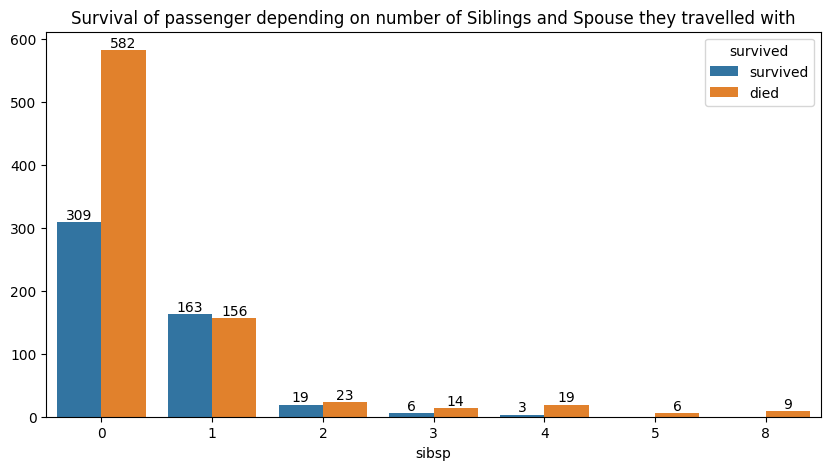

In [ ]:
plt.figure(figsize=(10,5))
x = sns.countplot(titanic, x='sibsp', hue='survived')
for i in x.containers:
  x.bar_label(i)
plt.title("Survival of passenger depending on number of Siblings and Spouse they travelled with")
plt.ylabel('')
plt.show()

Observations:
* Passengers who have travelled with zero or 3 parents/children have nearly ⅓rd of probability of Survival.
* Passengers who have travelled with one parents/children have above 50% of probability of Survival.
* Passengers who have travelled with 2 parents/children have nearly 50% probability of Survival.
* Passengers who have travelled with more than 3 parents/children have less number of probability of survival.

## Survival by Port of Embarkation

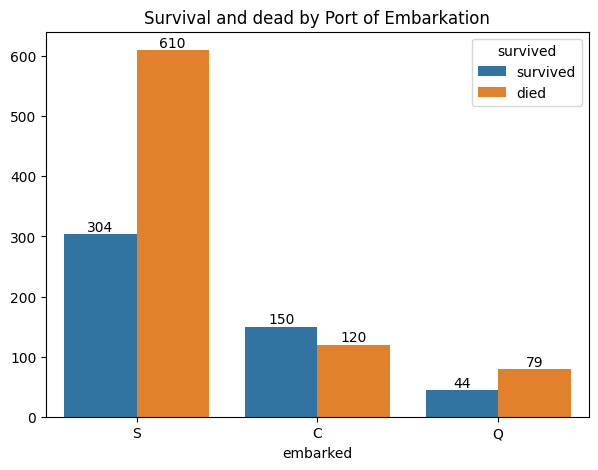

In [ ]:
plt.figure(figsize=(7,5))
x = sns.countplot(titanic, x='embarked', hue='survived')
for i in x.containers:
  x.bar_label(i)
plt.title("Survival and dead by Port of Embarkation")
plt.ylabel('')
plt.show()

Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

* Passengers whose Port of Embarkation is Cherbourg have 55% of probability of Survival.
* Passengers whose Port of Embarkation is Queenstown or Southampton have nearly 35% of probability of Survival.

## Overall Observation

**REPORT OF DATASET**

* Male passengers have 19% of probability of survival.
* Female passengers have 72% of probability of survival.


* Children have 57% of probability of Survival.
* Teenagers and Adults have around 40% of probability of Survival.
* Senior citizens have more 24% of probability of Survival.


* Class-1 Passengers have 61% of probability of Survival.
* Class-2 Passengers have 42% of probability of Survival.
* Class-3 Passengers have 25% of probability of Survival.


* Passengers who have travelled with no parents/children have nearly ⅓rd of probability of Survival.
* Passengers who have travelled with one parents/children have 58% probability of Survival.
* Passengers who have travelled with 2 or 3 parents/children have nearly 50% probability of Survival.
* Passengers who have travelled with more than 3 parents/children have very less probability of survival.



* Passengers who have travelled with zero or 3 parents/children have nearly ⅓rd of probability of Survival.
* Passengers who have travelled with one parents/children have above 50% of probability of Survival.
* Passengers who have travelled with 2 parents/children have nearly 50% probability of Survival.
* Passengers who have travelled with more than 3 parents/children have less number of probability of survival.



* Passengers whose Port of Embarkation is Cherbourg have 55% of probability of Survival.
* Passengers whose Port of Embarkation is Queenstown or Southampton have nearly 35% of probability of Survival.